In [160]:
import numpy as np
import pandas as pd

In [161]:
df = pd.read_csv('spotify_millsongdata.csv')
df

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
...,...,...,...,...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...


In [162]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [163]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [164]:
# Top artists and songs
top_artists = df['artist'].value_counts().head(10)
print("\nTop 10 Artists:")
print(top_artists)


Top 10 Artists:
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Cher                187
Alabama             187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [165]:

df = df.sample(10000)

df = df.drop('link', axis=1).reset_index(drop=True)

In [166]:
df.head()

,artist,song,text
0,America,All I Think About Is You,I rise to see you in the morning \r\nI feel y...
1,Richard Marx,The Other Side,"Everyone, even those I love \r\nSay that I mu..."
2,Misfits,Dream Lover,Every night I hope and pray a dream lover will...
3,U2,One Step Closer,I'm 'round the corner from anything that's rea...
4,Taylor Swift,Beautiful Eyes,Your beautiful eyes \r\nStare right into my e...


In [167]:
!pip install wordcloud

In [168]:

import os
import json

import zipfile

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [169]:
# WordCloud for song lyrics
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_lyrics)

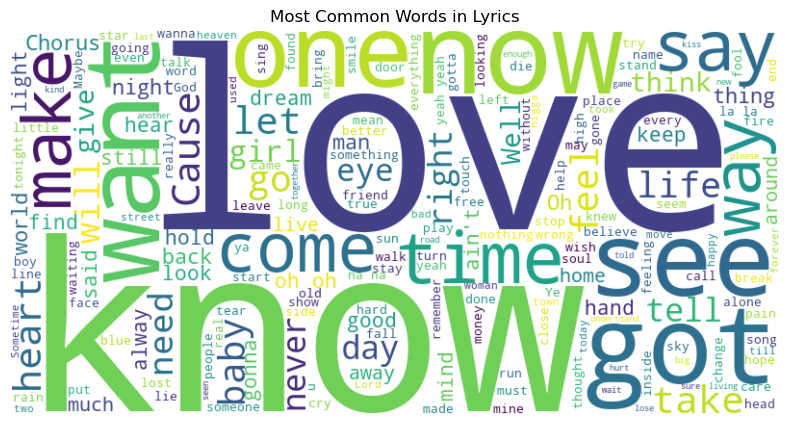

In [170]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Lyrics")
plt.show()

In [171]:
# download nltk data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/mini/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/mini/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/mini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [172]:
stop_words = set(stopwords.words('english'))


In [173]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)
     

In [174]:
# Apply preprocessing to lyrics
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [175]:
df.head()


,artist,song,text,cleaned_text
0,America,All I Think About Is You,I rise to see you in the morning \r\nI feel y...,rise see morning feel warmth true light inside...
1,Richard Marx,The Other Side,"Everyone, even those I love \r\nSay that I mu...",everyone even love say must move time pick pie...
2,Misfits,Dream Lover,Every night I hope and pray a dream lover will...,every night hope pray dream lover come way gir...
3,U2,One Step Closer,I'm 'round the corner from anything that's rea...,im round corner anything thats real im across ...
4,Taylor Swift,Beautiful Eyes,Your beautiful eyes \r\nStare right into my e...,beautiful eyes stare right eyes sometimes thin...


In [176]:
# Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [177]:
# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [178]:
# Recommendation Function
def recommend_songs(song_name, cosine_sim=cosine_sim, df=df, top_n=5):
    # Find the index of the song
    idx = df[df['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return "Song not found in the dataset!"   # can be reworked to compare for songs not present in the dataset
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # Get song indices
    song_indices = [i[0] for i in sim_scores]

    # Return top n similar songs
    return df[['artist', 'song']].iloc[song_indices]

In [179]:
df["song"][2]

'Dream Lover'

In [181]:
# Example Recommendation
print("\nRecommendations for the song 'Blinded By Rainbows':")
recommendations = recommend_songs("For The First Time") # df["song"][2]
print(recommendations)


Recommendations for the song 'Blinded By Rainbows':
              artist                      song
9718   Kenny Loggins        For The First Time
5927   George Strait  Last Time The First Time
6534      Pretenders                I Hurt You
7015    Carol Banawa                 I Believe
5582  Tragically Hip           Love Is A First
